In [55]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os

In [2]:
# Find Directory and Folders
Diri = "/glade/scratch/lydiaks/MPAS/final_project/"
KFC_KM = xr.open_dataset(Diri + 'latlon_diag_KFC_KM.nc')
KFC_WSM6M = xr.open_dataset(Diri + 'latlon_diag_KFC_WSM6M.nc')
TC_KM = xr.open_dataset(Diri + 'latlon_diag_TC_KM.nc')
TC_WSM6M = xr.open_dataset(Diri + 'latlon_diag_TC_WSM6M.nc')
KFC_KM

<xarray.Dataset>
Dimensions:                (Time: 105, latitude: 1200, longitude: 2400, nIsoLevelsT: 5, nIsoLevelsZ: 13)
Coordinates:
  * latitude               (latitude) float32 0.025 0.075 0.125 ... 59.93 59.97
  * longitude              (longitude) float32 -120.0 -119.9 ... -0.075 -0.02499
Dimensions without coordinates: Time, nIsoLevelsT, nIsoLevelsZ
Data variables:
    olrtoa                 (Time, latitude, longitude) float32 ...
    rainc                  (Time, latitude, longitude) float32 ...
    rainnc                 (Time, latitude, longitude) float32 ...
    precipw                (Time, latitude, longitude) float32 ...
    u10                    (Time, latitude, longitude) float32 ...
    v10                    (Time, latitude, longitude) float32 ...
    q2                     (Time, latitude, longitude) float32 ...
    t2m                    (Time, latitude, longitude) float32 ...
    th2m                   (Time, latitude, longitude) float32 ...
    mslp                   (Time, latitude, longitude) float32 ...
    relhum_200hPa          (Time, latitude, longitude) float32 ...
    relhum_250hPa          (Time, latitude, longitude) float32 ...
    relhum_500hPa          (Time, latitude, longitude) float32 ...
    relhum_700hPa          (Time, latitude, longitude) float32 ...
    relhum_850hPa          (Time, latitude, longitude) float32 ...
    relhum_925hPa          (Time, latitude, longitude) float32 ...
    dewpoint_200hPa        (Time, latitude, longitude) float32 ...
    dewpoint_250hPa        (Time, latitude, longitude) float32 ...
    dewpoint_500hPa        (Time, latitude, longitude) float32 ...
    dewpoint_700hPa        (Time, latitude, longitude) float32 ...
    dewpoint_850hPa        (Time, latitude, longitude) float32 ...
    dewpoint_925hPa        (Time, latitude, longitude) float32 ...
    temperature_200hPa     (Time, latitude, longitude) float32 ...
    temperature_250hPa     (Time, latitude, longitude) float32 ...
    temperature_500hPa     (Time, latitude, longitude) float32 ...
    temperature_700hPa     (Time, latitude, longitude) float32 ...
    temperature_850hPa     (Time, latitude, longitude) float32 ...
    temperature_925hPa     (Time, latitude, longitude) float32 ...
    height_200hPa          (Time, latitude, longitude) float32 ...
    height_250hPa          (Time, latitude, longitude) float32 ...
    height_500hPa          (Time, latitude, longitude) float32 ...
    height_700hPa          (Time, latitude, longitude) float32 ...
    height_850hPa          (Time, latitude, longitude) float32 ...
    height_925hPa          (Time, latitude, longitude) float32 ...
    uzonal_200hPa          (Time, latitude, longitude) float32 ...
    uzonal_250hPa          (Time, latitude, longitude) float32 ...
    uzonal_500hPa          (Time, latitude, longitude) float32 ...
    uzonal_700hPa          (Time, latitude, longitude) float32 ...
    uzonal_850hPa          (Time, latitude, longitude) float32 ...
    uzonal_925hPa          (Time, latitude, longitude) float32 ...
    umeridional_200hPa     (Time, latitude, longitude) float32 ...
    umeridional_250hPa     (Time, latitude, longitude) float32 ...
    umeridional_500hPa     (Time, latitude, longitude) float32 ...
    umeridional_700hPa     (Time, latitude, longitude) float32 ...
    umeridional_850hPa     (Time, latitude, longitude) float32 ...
    umeridional_925hPa     (Time, latitude, longitude) float32 ...
    w_200hPa               (Time, latitude, longitude) float32 ...
    w_250hPa               (Time, latitude, longitude) float32 ...
    w_500hPa               (Time, latitude, longitude) float32 ...
    w_700hPa               (Time, latitude, longitude) float32 ...
    w_850hPa               (Time, latitude, longitude) float32 ...
    w_925hPa               (Time, latitude, longitude) float32 ...
    vorticity_200hPa       (Time, latitude, longitude) float32 ...
    vorticity_250hPa       (Time, latitude, longitude) float32 ...
    vor

In [7]:
KFC_KM.mslp[78, 518:525, 728]

<xarray.DataArray 'mslp' (latitude: 7)>
array([101783.31, 101783.99, 101785.84, 101790.28, 101794.75, 101800.56,
       101810.32], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 25.92 25.98 26.02 26.07 26.12 26.17 26.22
    longitude  float32 -83.57
Attributes:
    units:      Pa
    long_name:  Mean sea-level pressure

In [8]:
KFC_WSM6M.mslp[78, 518:525, 728]

<xarray.DataArray 'mslp' (latitude: 7)>
array([101740.68 , 101741.875, 101743.41 , 101745.32 , 101747.31 , 101749.31 ,
       101751.28 ], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 25.92 25.98 26.02 26.07 26.12 26.17 26.22
    longitude  float32 -83.57
Attributes:
    units:      Pa
    long_name:  Mean sea-level pressure

In [9]:
TC_KM.mslp[78, 518:525, 728]

<xarray.DataArray 'mslp' (latitude: 7)>
array([101850.61 , 101852.24 , 101855.234, 101854.31 , 101855.195, 101858.4  ,
       101864.1  ], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 25.92 25.98 26.02 26.07 26.12 26.17 26.22
    longitude  float32 -83.57
Attributes:
    units:      Pa
    long_name:  Mean sea-level pressure

In [10]:
TC_WSM6M.mslp[78, 518:525, 728]

<xarray.DataArray 'mslp' (latitude: 7)>
array([101940.96 , 101943.23 , 101946.47 , 101949.56 , 101952.625, 101955.375,
       101957.266], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 25.92 25.98 26.02 26.07 26.12 26.17 26.22
    longitude  float32 -83.57
Attributes:
    units:      Pa
    long_name:  Mean sea-level pressure

In [11]:
for i in range(8):
    print (int(8.97+0.01*i), int((27+i)%30+1))

8 28
8 29
8 30
9 1
9 2
9 3
9 4
9 5


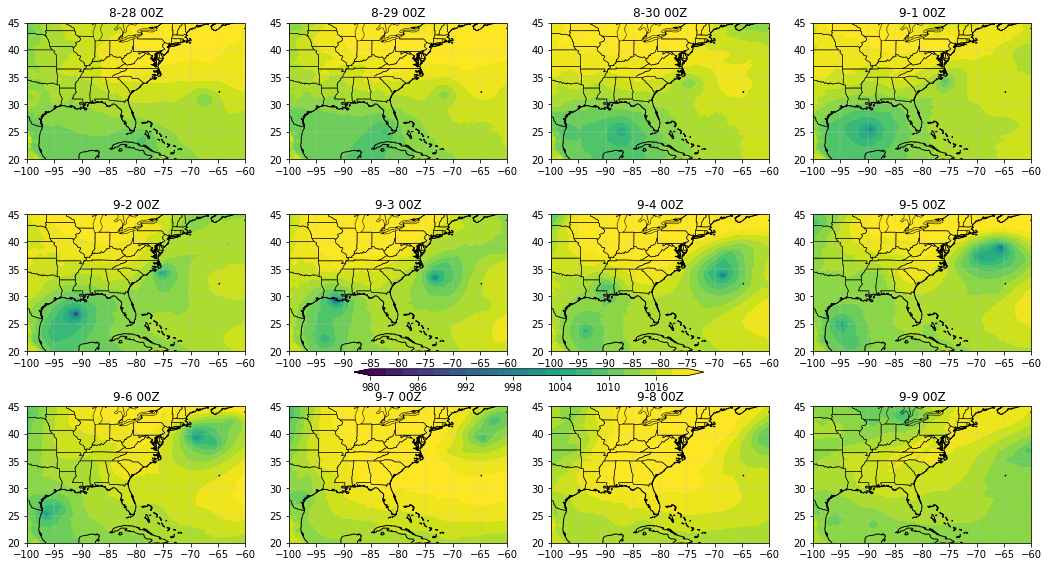

In [153]:
# Plot Surface Pressure For KFC KM
Fig = pyplot.figure(figsize=(18,10))
Count = 0
for i in range(12):
    Count += 1
    Axes = Fig.add_subplot(3,4, Count, projection=ccrs.PlateCarree())
#
# Draw Coastlines
    Axes.coastlines()
    Axes.add_feature(cfeature.BORDERS, linewidth=0.6)
    Axes.add_feature(cfeature.STATES, linewidth=0.5)
#
# Define Colour Levels
    Colour_Levels = numpy.arange(980,1022,2)
#
# Use Function to Find Pressure at Day 10
    KFC_KM_SLP = KFC_KM.mslp[i*8] / 100.
#
# Plot Colour Contour
    Colour_Plot = Axes.contourf(KFC_KM_SLP.longitude, KFC_KM_SLP.latitude, KFC_KM_SLP, \
    cmap='viridis', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    Title = str(int(8.97+0.01*i)) + '-' + str(int((27+i)%30+1)) + ' 00Z'
    pyplot.title(Title, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-100,-55,5)
    y_Axis = numpy.arange(20,50,5)
    Axes.set_xticks(x_Axis)
    Axes.set_yticks(y_Axis)
    pyplot.xlim(-100,-60)
    pyplot.ylim(20,45)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Colour_Bar
    if i==5:
        Cax = Axes.inset_axes([0.3, -0.18, 1.6, 0.05], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
##Fig.savefig('Q2.png', bbox_inches='tight')

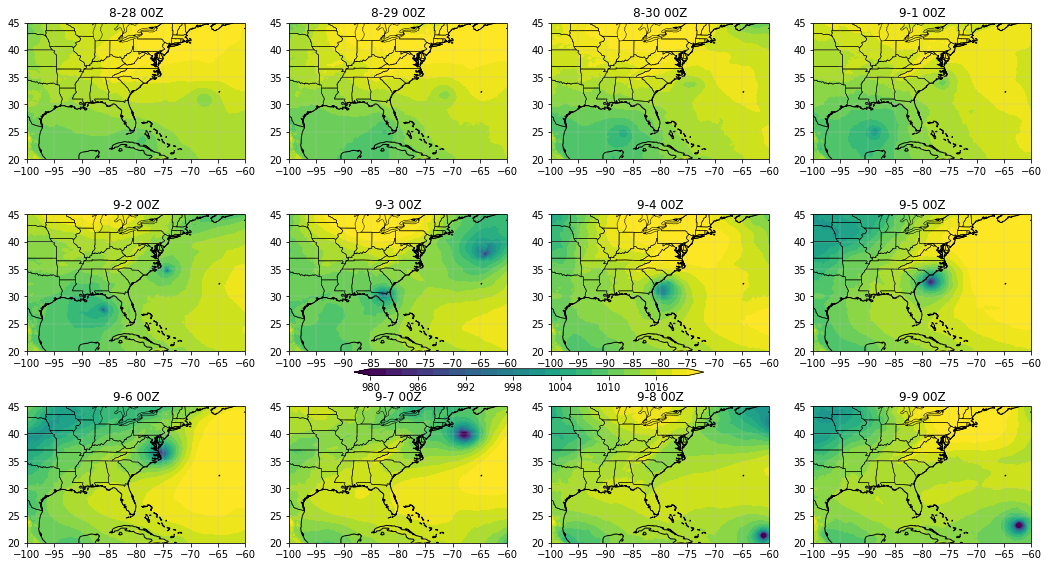

In [154]:
# Plot Surface Pressure For KFC WSM6M
Fig = pyplot.figure(figsize=(18,10))
Count = 0
for i in range(12):
    Count += 1
    Axes = Fig.add_subplot(3,4, Count, projection=ccrs.PlateCarree())
#
# Draw Coastlines
    Axes.coastlines()
    Axes.add_feature(cfeature.BORDERS, linewidth=0.6)
    Axes.add_feature(cfeature.STATES, linewidth=0.5)
#
# Define Colour Levels
    Colour_Levels = numpy.arange(980,1022,2)
#
# Use Function to Find Pressure at Day 10
    KFC_WSM6M_SLP = KFC_WSM6M.mslp[i*8] / 100.
#
# Plot Colour Contour
    Colour_Plot = Axes.contourf(KFC_WSM6M_SLP.longitude, KFC_WSM6M_SLP.latitude, KFC_WSM6M_SLP, \
    cmap='viridis', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    Title = str(int(8.97+0.01*i)) + '-' + str(int((27+i)%30+1)) + ' 00Z'
    pyplot.title(Title, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-100,-55,5)
    y_Axis = numpy.arange(20,50,5)
    Axes.set_xticks(x_Axis)
    Axes.set_yticks(y_Axis)
    pyplot.xlim(-100,-60)
    pyplot.ylim(20,45)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Colour_Bar
    if i==5:
        Cax = Axes.inset_axes([0.3, -0.18, 1.6, 0.05], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
##Fig.savefig('Q2.png', bbox_inches='tight')

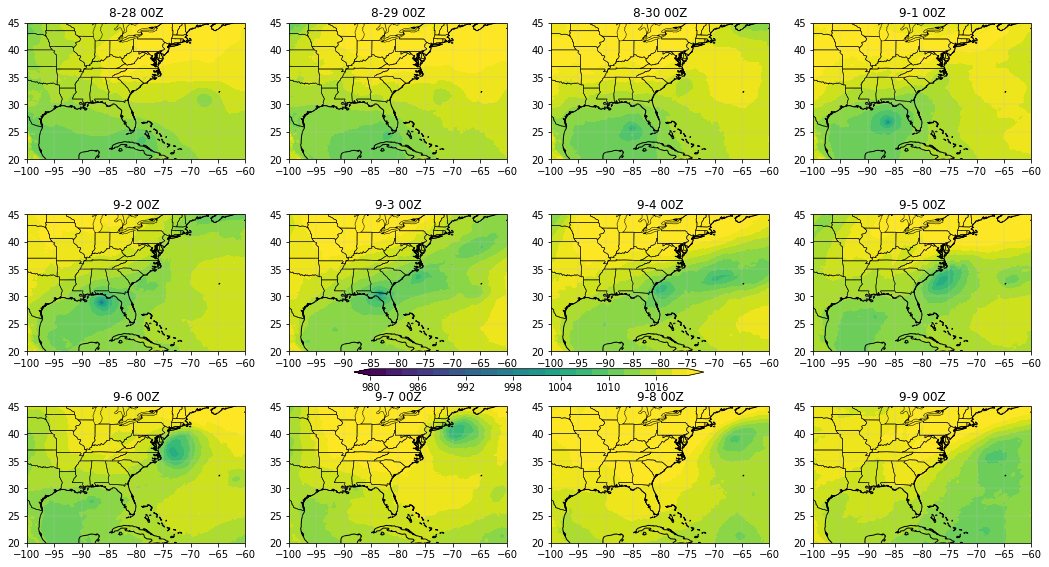

In [155]:
# Plot Surface Pressure For TC KM
Fig = pyplot.figure(figsize=(18,10))
Count = 0
for i in range(12):
    Count += 1
    Axes = Fig.add_subplot(3,4, Count, projection=ccrs.PlateCarree())
#
# Draw Coastlines
    Axes.coastlines()
    Axes.add_feature(cfeature.BORDERS, linewidth=0.6)
    Axes.add_feature(cfeature.STATES, linewidth=0.5)
#
# Define Colour Levels
    Colour_Levels = numpy.arange(980,1022,2)
#
# Use Function to Find Pressure at Day 10
    TC_KM_SLP = TC_KM.mslp[i*8] / 100.
#
# Plot Colour Contour
    Colour_Plot = Axes.contourf(TC_KM_SLP.longitude, TC_KM_SLP.latitude, TC_KM_SLP, \
    cmap='viridis', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    Title = str(int(8.97+0.01*i)) + '-' + str(int((27+i)%30+1)) + ' 00Z'
    pyplot.title(Title, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-100,-55,5)
    y_Axis = numpy.arange(20,50,5)
    Axes.set_xticks(x_Axis)
    Axes.set_yticks(y_Axis)
    pyplot.xlim(-100,-60)
    pyplot.ylim(20,45)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Colour_Bar
    if i==5:
        Cax = Axes.inset_axes([0.3, -0.18, 1.6, 0.05], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
##Fig.savefig('Q2.png', bbox_inches='tight')

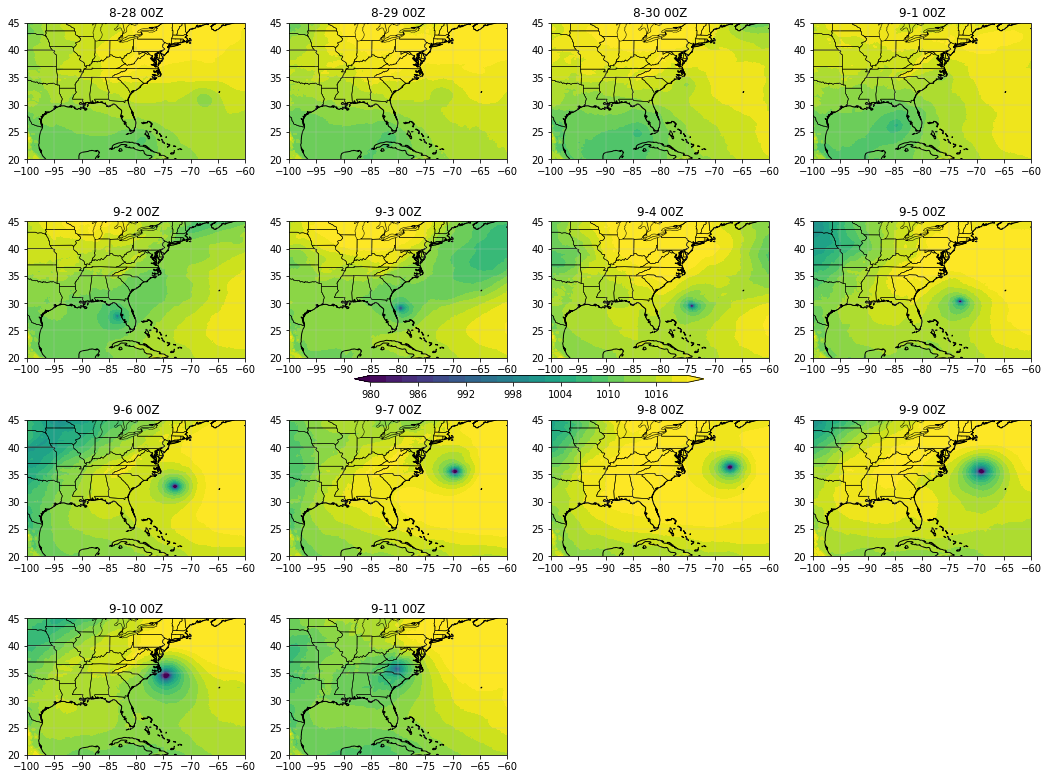

In [152]:
# Plot Surface Pressure For TC WSM6M
Fig = pyplot.figure(figsize=(18,14))
Count = 0
for i in range(14):
    Count += 1
    Axes = Fig.add_subplot(4,4, Count, projection=ccrs.PlateCarree())
#
# Draw Coastlines
    Axes.coastlines()
    Axes.add_feature(cfeature.BORDERS, linewidth=0.6)
    Axes.add_feature(cfeature.STATES, linewidth=0.5)
#
# Define Colour Levels
    Colour_Levels = numpy.arange(980,1022,2)
#
# Use Function to Find Pressure at Day 10
    TC_WSM6M_SLP = TC_WSM6M.mslp[i*8] / 100.
#
# Plot Colour Contour
    Colour_Plot = Axes.contourf(TC_WSM6M_SLP.longitude, TC_WSM6M_SLP.latitude, TC_WSM6M_SLP, \
    cmap='viridis', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    Title = str(int(8.97+0.01*i)) + '-' + str(int((27+i)%30+1)) + ' 00Z'
    pyplot.title(Title, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-100,-55,5)
    y_Axis = numpy.arange(20,50,5)
    Axes.set_xticks(x_Axis)
    Axes.set_yticks(y_Axis)
    pyplot.xlim(-100,-60)
    pyplot.ylim(20,45)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Colour_Bar
    if i==5:
        Cax = Axes.inset_axes([0.3, -0.18, 1.6, 0.05], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
##Fig.savefig('Q2.png', bbox_inches='tight')

In [95]:
KFC_KM.longitude[700:1200]

<xarray.DataArray 'longitude' (longitude: 500)>
array([-84.975   , -84.925   , -84.87499 , ..., -60.124992, -60.074993,
       -60.024998], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -84.97 -84.93 -84.87 ... -60.12 -60.07 -60.02
Attributes:
    units:          degree_east
    long_name:      longitude
    standard_name:  longitude

In [94]:
KFC_KM.latitude[525:900]

<xarray.DataArray 'latitude' (latitude: 375)>
array([26.274998, 26.324999, 26.375002, ..., 44.875004, 44.925   , 44.975   ],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 26.27 26.32 26.38 26.42 ... 44.88 44.92 44.97
Attributes:
    units:          degree_north
    long_name:      latitude
    standard_name:  latitude

In [42]:
# Create Function to Find Pressure and Lat Lon of Minimum SLP Location
def Min_SLP_Func(SLP):
    Min_SLP = float(numpy.min(SLP))
    Min_SLP_Where = numpy.where(SLP == Min_SLP)
    Min_SLP_Lat = SLP.latitude[Min_SLP_Where[0][0]]
    Min_SLP_Lon = SLP.longitude[Min_SLP_Where[1][0]]
    return (Min_SLP, Min_SLP_Lat, Min_SLP_Lon)

In [130]:
# Create Function to Create Colour List
def Colour_List_Func(Min_SLP):
    Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red', 'darkviolet']
    Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', \
    '970-980hPa', '955-970hPa', '940-955hPa', '<940hPa']
    Colour_List = []
    for i in range(len(Min_SLP)):
        if Min_SLP[i] >= 1010:
            Colour_List.append(Colours[0])
        elif Min_SLP[i] >= 1005:
            Colour_List.append(Colours[1])
        elif Min_SLP[i] >= 1000:
            Colour_List.append(Colours[2])
        elif Min_SLP[i] >= 990:
            Colour_List.append(Colours[3])
        elif Min_SLP[i] >= 980:
            Colour_List.append(Colours[4])
        elif Min_SLP[i] >= 970:
            Colour_List.append(Colours[5])
        elif Min_SLP[i] >= 955:
            Colour_List.append(Colours[6])
        elif Min_SLP[i] >= 940:
            Colour_List.append(Colours[7])
        else:
            Colour_List.append(Colours[8])
    return (Colour_List)

In [131]:
# Find SLP and Location For Each Time Step
KFC_KM_Min_SLP = numpy.zeros((3,53))
for i in range(len(KFC_KM_Min_SLP[0])):
# Keep Data Within Target Area
    if i < 40:
        KFC_KM_SLP = KFC_KM.mslp[i, 400:700, 550:830] / 100.
    else:
        KFC_KM_SLP = KFC_KM.mslp[i, 525:800, 550:830] / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    KFC_KM_Min_SLP[0][i], KFC_KM_Min_SLP[1][i], KFC_KM_Min_SLP[2][i] = Min_SLP_Func(KFC_KM_SLP)
#    print (KFC_KM_Min_SLP[0][i], KFC_KM_Min_SLP[1][i], KFC_KM_Min_SLP[2][i])
#
# Create Colour List
KFC_KM_Colour = Colour_List_Func(KFC_KM_Min_SLP[0])
print (KFC_KM_Min_SLP)
print (KFC_KM_Colour)

[[1009.4621582  1010.40405273 1009.08184814 1008.35528564 1008.92260742
  1009.27502441 1008.42657471 1007.34295654 1007.50018311 1007.53985596
  1006.25201416 1005.29473877 1005.72747803 1006.22296143 1005.46606445
  1004.10296631 1004.08123779 1004.76611328 1004.1350708  1002.59240723
  1002.5904541  1002.77435303 1001.46661377  999.36883545  998.41015625
   996.16455078  993.49743652  989.46057129  986.55310059  982.76281738
   979.56762695  974.52185059  969.70593262  968.58587646  968.65380859
   965.76330566  969.20098877  970.83258057  972.4074707   969.23913574
   970.58459473  980.97180176  988.56817627  994.46020508  999.96795654
  1003.65234375 1004.89135742 1006.06079102 1007.83544922 1009.40759277
  1009.34326172 1009.28625488 1010.40020752]
 [  23.27499962   23.57499886   23.82499886   24.22500038   24.67499733
    24.77499962   24.82500076   24.97500038   24.82500076   25.22500038
    25.17499924   25.17499924   25.125        25.02499962   25.07500076
    24.92499924   2

In [132]:
# Find SLP and Location For Each Time Step
KFC_WSM6M_Min_SLP = numpy.zeros((3,79))
for i in range(len(KFC_WSM6M_Min_SLP[0])):
# Keep Data Within Target Area
    if i < 48 and i != 45:
        KFC_WSM6M_SLP = KFC_WSM6M.mslp[i, 400:700, 550:830] / 100.
    elif i == 45:
        KFC_WSM6M_SLP = KFC_WSM6M.mslp[i, 400:700, 550:800] / 100.
    else:
        KFC_WSM6M_SLP = KFC_WSM6M.mslp[i, 525:900, 700:1200] / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    KFC_WSM6M_Min_SLP[0][i], KFC_WSM6M_Min_SLP[1][i], KFC_WSM6M_Min_SLP[2][i] = Min_SLP_Func(KFC_WSM6M_SLP)
#    print (i, KFC_WSM6M_Min_SLP[0][i], KFC_WSM6M_Min_SLP[1][i], KFC_WSM6M_Min_SLP[2][i])
#
# Create Colour List
KFC_WSM6M_Colour = Colour_List_Func(KFC_WSM6M_Min_SLP[0])
print (KFC_WSM6M_Min_SLP)
print (KFC_WSM6M_Colour)

[[1009.4621582  1010.30895996 1009.0022583  1008.35046387 1008.93829346
  1009.58013916 1008.82580566 1007.51513672 1007.60333252 1007.72924805
  1006.54046631 1005.6640625  1006.22045898 1006.91674805 1006.32757568
  1004.84521484 1004.61645508 1005.3137207  1005.3503418  1004.34674072
  1004.06506348 1004.47955322 1003.25463867 1001.33148193 1000.83081055
  1002.57635498 1002.69567871 1001.77642822 1000.78826904  999.20501709
   991.2956543   983.33728027  979.83685303  967.70843506  973.70025635
   969.91094971  964.69537354  969.68658447  974.70452881  982.4564209
   988.93890381  994.77709961  996.48126221  997.20678711  998.9934082
   999.78149414  999.64147949  999.02362061  997.74029541  996.95404053
   994.0123291   991.34643555  989.54779053  986.54638672  984.92626953
   984.0100708   984.47235107  982.70794678  978.10015869  977.66583252
   981.32232666  984.046875    986.03607178  987.44781494  988.20916748
   986.45288086  982.39544678  980.7779541   979.08001709  977.994

In [133]:
# Find SLP and Location For Each Time Step
TC_KM_Min_SLP = numpy.zeros((3,76))
for i in range(len(TC_KM_Min_SLP[0])):
# Keep Data Within Target Area
    if i < 40:
        TC_KM_SLP = TC_KM.mslp[i, 400:700, 550:830] / 100.
    elif i < 56:
        TC_KM_SLP = TC_KM.mslp[i, 525:800, 550:900] / 100.
    else:
        TC_KM_SLP = TC_KM.mslp[i, 525:900, 700:1200] / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    TC_KM_Min_SLP[0][i], TC_KM_Min_SLP[1][i], TC_KM_Min_SLP[2][i] = Min_SLP_Func(TC_KM_SLP)
#    print (TC_KM_Min_SLP[0][i], TC_KM_Min_SLP[1][i], TC_KM_Min_SLP[2][i])
#
# Create Colour List
TC_KM_Colour = Colour_List_Func(TC_KM_Min_SLP[0])
print (TC_KM_Min_SLP)
print (TC_KM_Colour)

[[1009.4621582  1010.8059082  1009.60424805 1009.37200928 1009.99664307
  1010.46203613 1009.3838501  1008.04541016 1008.78991699 1009.44360352
  1008.35681152 1007.93829346 1008.00732422 1007.48052979 1006.33312988
  1004.8046875  1005.43981934 1004.57452393 1003.35913086 1001.49139404
  1000.76977539 1001.41790771  999.81091309  998.45330811  998.07849121
   998.67468262  997.53826904  996.23681641  994.88549805  994.31414795
   991.83905029  987.78997803  984.79266357  986.2276001   985.39202881
   984.43029785  986.64978027  991.31915283  993.7220459   994.88415527
   997.91088867 1001.51062012 1003.17297363 1004.38696289 1005.97064209
  1006.77520752 1006.28967285 1005.8503418  1006.59466553 1006.62780762
  1005.76165771 1004.47406006 1005.07049561 1005.54547119 1004.52001953
  1004.31341553 1005.08001709 1004.77838135 1003.46795654 1003.77758789
  1004.03619385 1004.00195312 1003.91821289 1004.21533203 1005.31158447
  1005.54608154 1005.03631592 1004.91204834 1005.06506348 1004.6

In [134]:
# Find SLP and Location For Each Time Step
TC_WSM6M_Min_SLP = numpy.zeros((3,105))
for i in range(len(TC_WSM6M_Min_SLP[0])):
# Keep Data Within Target Area
    if i < 40:
        TC_WSM6M_SLP = TC_WSM6M.mslp[i, 400:700, 550:830] / 100.
    else:
        TC_WSM6M_SLP = TC_WSM6M.mslp[i, 525:900, 700:1200] / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    TC_WSM6M_Min_SLP[0][i], TC_WSM6M_Min_SLP[1][i], TC_WSM6M_Min_SLP[2][i] = Min_SLP_Func(TC_WSM6M_SLP)
#    print (TC_WSM6M_Min_SLP[0][i], TC_WSM6M_Min_SLP[1][i], TC_WSM6M_Min_SLP[2][i])
#
# Create Colour List
TC_WSM6M_Colour = Colour_List_Func(TC_WSM6M_Min_SLP[0])
print (TC_WSM6M_Min_SLP)
print (TC_WSM6M_Colour)

[[1009.4621582  1010.72125244 1009.59680176 1009.31451416 1009.98223877
  1010.49017334 1009.50250244 1007.95080566 1008.28204346 1008.75036621
  1007.66314697 1006.9977417  1007.30151367 1007.7958374  1007.22491455
  1005.90576172 1005.96618652 1007.07421875 1006.67749023 1005.44952393
  1005.29681396 1005.9440918  1004.80712891 1003.48553467 1003.80224609
  1004.86181641 1003.89929199 1002.14935303 1000.31420898  997.82751465
   994.51843262  989.92492676  988.48852539  989.82507324  984.03283691
   983.4453125   986.20446777  988.17889404  988.43774414  987.75299072
   988.09680176  984.44421387  976.52984619  967.51776123  966.36694336
   962.99945068  959.87799072  965.33081055  970.9932251   973.60626221
   971.03717041  971.9677124   975.77575684  972.1729126   968.13092041
   966.41680908  965.29382324  964.38763428  955.89556885  953.63232422
   950.62805176  946.00268555  941.5546875   937.45532227  937.96765137
   939.76916504  940.32647705  943.87353516  946.67681885  948.1

In [135]:
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', \
'970-980hPa', '955-970hPa', '940-955hPa', '<940hPa']

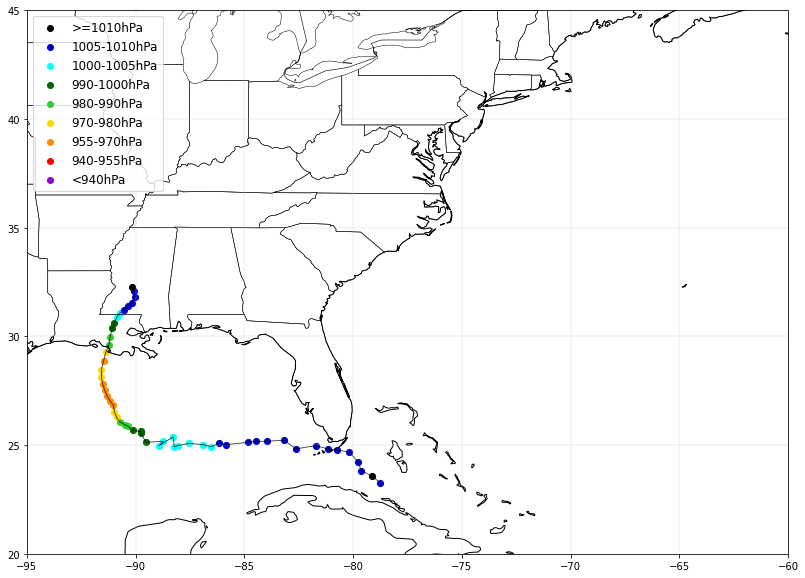

In [136]:
# Plot Hermine Track Using KFC KM Model
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
Axis.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot KFC KM
pyplot.plot(KFC_KM_Min_SLP[2], KFC_KM_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
for i in range(len(KFC_KM_Min_SLP[0])):
    pyplot.scatter(KFC_KM_Min_SLP[2][i], KFC_KM_Min_SLP[1][i], c=KFC_KM_Colour[i], s=38)
#
# Add Gridlines
x_Axis = numpy.arange(-100,-55,5)
y_Axis = numpy.arange(20,50,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
pyplot.xlim(-95,-60)
pyplot.ylim(20,45)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
#pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=2, fontsize=12)
#Fig.savefig('Q3_Compare.png', bbox_inches='tight')

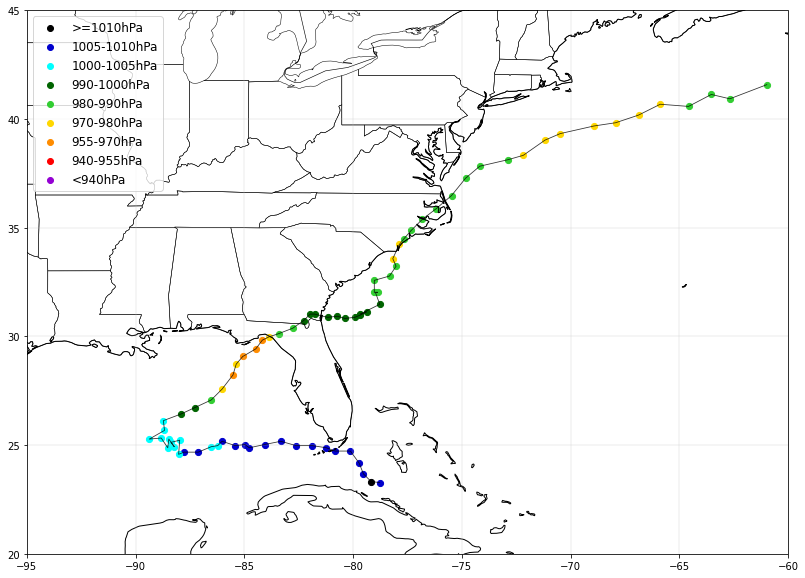

In [137]:
# Plot Hermine Track Using KFC WSM6M Model
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
Axis.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot KFC WSM6M
pyplot.plot(KFC_WSM6M_Min_SLP[2], KFC_WSM6M_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
for i in range(len(KFC_WSM6M_Min_SLP[0])):
    pyplot.scatter(KFC_WSM6M_Min_SLP[2][i], KFC_WSM6M_Min_SLP[1][i], c=KFC_WSM6M_Colour[i], s=38)
#
# Add Gridlines
x_Axis = numpy.arange(-100,-55,5)
y_Axis = numpy.arange(20,50,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
pyplot.xlim(-95,-60)
pyplot.ylim(20,45)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
#pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=2, fontsize=12)
#Fig.savefig('Q3_Compare.png', bbox_inches='tight')

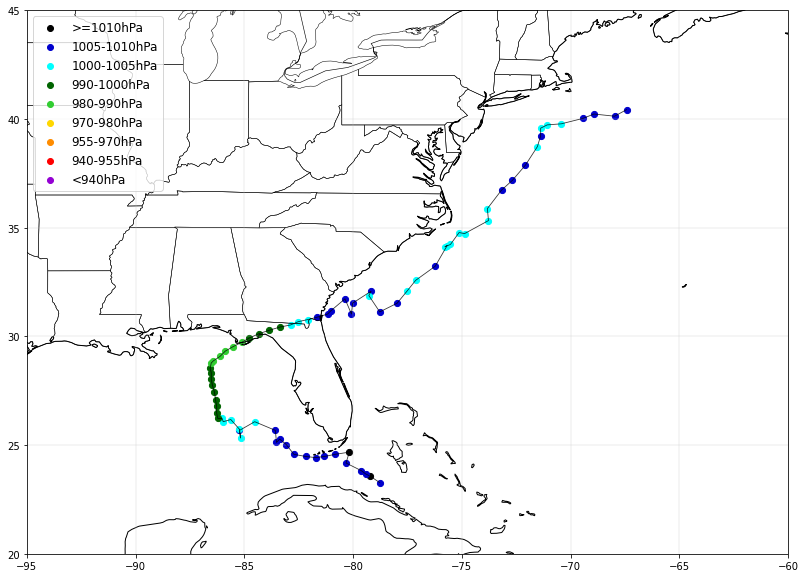

In [138]:
# Plot Hermine Track Using TC KM Model
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
Axis.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot TC KM
pyplot.plot(TC_KM_Min_SLP[2], TC_KM_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
for i in range(len(TC_KM_Min_SLP[0])):
    pyplot.scatter(TC_KM_Min_SLP[2][i], TC_KM_Min_SLP[1][i], c=TC_KM_Colour[i], s=38)
#
# Add Gridlines
x_Axis = numpy.arange(-100,-55,5)
y_Axis = numpy.arange(20,50,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
pyplot.xlim(-95,-60)
pyplot.ylim(20,45)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
#pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=2, fontsize=12)
#Fig.savefig('Q3_Compare.png', bbox_inches='tight')

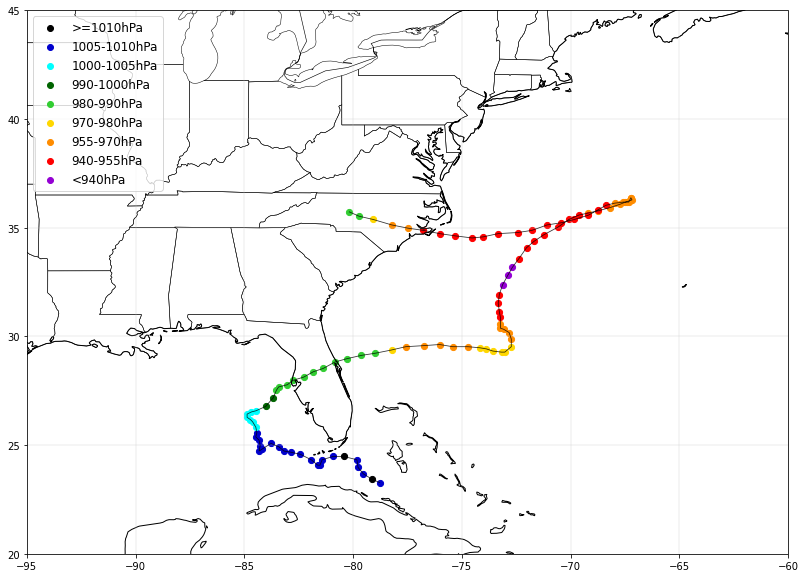

In [139]:
# Plot Hermine Track Using TC WSM6M Model
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
Axis.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot TC WSM6M
pyplot.plot(TC_WSM6M_Min_SLP[2], TC_WSM6M_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
for i in range(len(TC_WSM6M_Min_SLP[0])):
    pyplot.scatter(TC_WSM6M_Min_SLP[2][i], TC_WSM6M_Min_SLP[1][i], c=TC_WSM6M_Colour[i], s=38)
#
# Add Gridlines
x_Axis = numpy.arange(-100,-55,5)
y_Axis = numpy.arange(20,50,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
pyplot.xlim(-95,-60)
pyplot.ylim(20,45)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
#pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=2, fontsize=12)
#Fig.savefig('Q3_Compare.png', bbox_inches='tight')

In [148]:
# Best Track Data
Hermine_Best_Track = pandas.read_csv("Hurricane_Hermine_BST.csv")
BST_Min_SLP = numpy.zeros((3, len(Hermine_Best_Track["Pressure"])))
BST_Tropical = []
for i in range(len(Hermine_Best_Track["Pressure"])):
    BST_Min_SLP[0][i] = Hermine_Best_Track["Pressure"][i]
    BST_Min_SLP[1][i] = Hermine_Best_Track["Lat"][i]
    BST_Min_SLP[2][i] = Hermine_Best_Track["Lon"][i]
    if Hermine_Best_Track["Tropical?"][i] == "Tropical":
        BST_Tropical.append("o")
    else:
        BST_Tropical.append("^")
#
# Create Colour List
BST_Colour = Colour_List_Func(BST_Min_SLP[0])

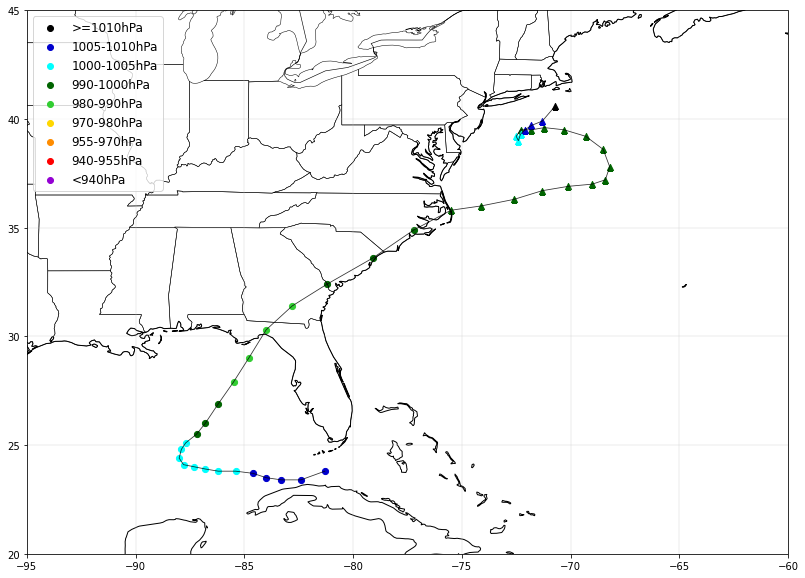

In [150]:
# Plot Hermine Best Track
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
Axis.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot TC WSM6M
pyplot.plot(BST_Min_SLP[2], BST_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
for i in range(len(BST_Min_SLP[0])):
    pyplot.scatter(BST_Min_SLP[2][i], BST_Min_SLP[1][i], c=BST_Colour[i], marker=BST_Tropical[i], s=38)
#
# Add Gridlines
x_Axis = numpy.arange(-100,-55,5)
y_Axis = numpy.arange(20,50,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
pyplot.xlim(-95,-60)
pyplot.ylim(20,45)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
#pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=2, fontsize=12)
#Fig.savefig('Q3_Compare.png', bbox_inches='tight')

In [156]:
Model_List = ["Kain-Fritsch Convection + Kessler Microphysics", "Kain-Fritsch Convection + WSM6 Microphysics", \
"Tiedtke Convection + Kessler Microphysics", "Tiedtke Convection + WSM6 Microphysics"]

In [ ]:
# Plot Surface Pressure For TC WSM6M
Fig = pyplot.figure(figsize=(18,10))
Count = 0
for i in range(5):
    Count += 1
    Axes = Fig.add_subplot(2,3, Count, projection=ccrs.PlateCarree())
#
# Draw Coastlines
    Axes.coastlines()
    Axes.add_feature(cfeature.BORDERS, linewidth=0.6)
    Axes.add_feature(cfeature.STATES, linewidth=0.5)
#
# Plot Best Track
    if i == 2:
        pyplot.plot(BST_Min_SLP[2], BST_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
        for k in range(len(BST_Min_SLP[0])):
            pyplot.scatter(BST_Min_SLP[2][k], BST_Min_SLP[1][k], c=BST_Colour[k], marker=BST_Tropical[k], s=38)
        pyplot.title("Best Track", fontsize=12)
#
# Plot KFC KM
    if i == 0:
        pyplot.plot(KFC_KM_Min_SLP[2], KFC_KM_Min_SLP[1], c='black', linewidth=0.8, linestyle='-', alpha=0.8)
        for k in range(len(KFC_KM_Min_SLP[0])):
            pyplot.scatter(KFC_KM_Min_SLP[2][k], KFC_KM_Min_SLP[1][k], c=KFC_KM_Colour[k], s=38)
        pyplot.title(Model_List[i], fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-100,-55,5)
    y_Axis = numpy.arange(20,50,5)
    Axes.set_xticks(x_Axis)
    Axes.set_yticks(y_Axis)
    pyplot.xlim(-100,-60)
    pyplot.ylim(20,45)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Legend
    for k in range(len(Colours)):
        pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
    pyplot.legend(loc=2, fontsize=12)
##Fig.savefig('Q2.png', bbox_inches='tight')